# Exploring the usability of the test.csv file as training data

Import modules

In [1]:
from sklearn import linear_model
from sklearn import model_selection
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Import test data to explore it

In [2]:
df = pd.read_csv("src/test_clean.csv")
df.head()

,id,date,store_nbr,item_nbr,onpromotion
0,125497040,2017-08-16,1,96995,0
1,125497041,2017-08-16,1,99197,0
2,125497042,2017-08-16,1,103501,0
3,125497043,2017-08-16,1,103520,0
4,125497044,2017-08-16,1,103665,0


In [3]:
num_rows = df.shape[0]
num_cols = df.shape[1]
print("Number of rows in df:", num_rows)
print("Number of cols in df:", num_cols)

Number of rows in df: 3370464
Number of cols in df: 5


In [4]:
for col in df.columns:
    print(f"{col} is of type {df[col].dtype}")

id is of type int64
date is of type object
store_nbr is of type int64
item_nbr is of type int64
onpromotion is of type int64


In [5]:
# Change date column to date type
df['date'] = pd.to_datetime(df['date'])
for col in df.columns:
    print(f"{col} is of type {df[col].dtype}")

id is of type int64
date is of type datetime64[ns]
store_nbr is of type int64
item_nbr is of type int64
onpromotion is of type int64


In [6]:
# What is the range of dates?
min_date = df['date'].min()
max_date = df['date'].max()

print("Minimum Date:", min_date)
print("Maximum Date:", max_date)

# This seems short, lets look at the unique values
unique_dates = df['date'].unique()
print(f"The range of unique dates in the test_clean file is {unique_dates}")

Minimum Date: 2017-08-16 00:00:00
Maximum Date: 2017-08-31 00:00:00
The range of unique dates in the test_clean file is <DatetimeArray>
['2017-08-16 00:00:00', '2017-08-17 00:00:00', '2017-08-18 00:00:00',
 '2017-08-19 00:00:00', '2017-08-20 00:00:00', '2017-08-21 00:00:00',
 '2017-08-22 00:00:00', '2017-08-23 00:00:00', '2017-08-24 00:00:00',
 '2017-08-25 00:00:00', '2017-08-26 00:00:00', '2017-08-27 00:00:00',
 '2017-08-28 00:00:00', '2017-08-29 00:00:00', '2017-08-30 00:00:00',
 '2017-08-31 00:00:00']
Length: 16, dtype: datetime64[ns]


The data in test_clean.csv seems short. Lets look at the raw file.

In [7]:
df_raw = pd.read_csv("src/test.csv")
# What is the range of dates?
min_date = df_raw['date'].min()
max_date = df_raw['date'].max()

print("Minimum Date:", min_date)
print("Maximum Date:", max_date)

# This seems short, lets look at the unique values
unique_dates = df_raw['date'].unique()
print(f"The range of unique dates in the test_clean file is {unique_dates}")

Minimum Date: 2017-08-16
Maximum Date: 2017-08-31
The range of unique dates in the test_clean file is ['2017-08-16' '2017-08-17' '2017-08-18' '2017-08-19' '2017-08-20'
 '2017-08-21' '2017-08-22' '2017-08-23' '2017-08-24' '2017-08-25'
 '2017-08-26' '2017-08-27' '2017-08-28' '2017-08-29' '2017-08-30'
 '2017-08-31']


The raw file has the same date range. I'm not going to be able to train a model for seasonal predictions.

# Plan of Action

## Step 1
Load and format sales data for the model.
The sales data column 'date' will be removed in favor of a month and day column.

## Step 2
The sales data will be split in 5 folds. 4 will be used to train the model. 1 will be used to test.

## Step 3
Based on the accuracy I will iterate the parameters of the model to get a higher score.

## Step 4
Once this is done I can use the model to predict the amount of an item you will sell. 
For that I use the test data, which will add a column to it called "predicted_sales".

# Step 1: Load and format sales data for the model

In [8]:
# Load salesdata
df_sales = pd.read_csv("src/sales_clean.csv")

# select relevant columns
selected_columns = ['date', 'store_nbr', 'item_nbr', 'unit_sales']
df_ML = df_sales[selected_columns]

#Formatting the date column
df_ML['date'] = pd.to_datetime(df_ML['date'])

# Extract month and day into new columns
df_ML['month'] = df_ML['date'].dt.month
df_ML['day'] = df_ML['date'].dt.day

# Delete the original 'date' column
df_ML.drop(columns=['date'], inplace=True)

# Put the unit_sales column in the last position
df_ML = df_ML[[col for col in df_ML if col != 'unit_sales'] + ['unit_sales']]

# Print the modified DataFrame
print(df_ML)


         store_nbr  item_nbr  month  day  unit_sales
0               25    103665      1    1         7.0
1               25    214381      1    1         5.0
2               25    315179      1    1         4.0
3               25    414752      1    1         1.0
4               25    557408      1    1         3.0
...            ...       ...    ...  ...         ...
2091613         54   1711747      8   15         1.0
2091614         54   1964356      8   15        11.0
2091615         54   2006310      8   15         1.0
2091616         54   2018471      8   15         1.0
2091617         54   2061033      8   15        23.0

[2091618 rows x 5 columns]


C:\Users\tangu\AppData\Local\Temp\ipykernel_9636\1313334988.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ML['date'] = pd.to_datetime(df_ML['date'])
C:\Users\tangu\AppData\Local\Temp\ipykernel_9636\1313334988.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ML['month'] = df_ML['date'].dt.month
C:\Users\tangu\AppData\Local\Temp\ipykernel_9636\1313334988.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [9]:
# What is the range of dates?
min_month = df_ML['month'].min()
max_month = df_ML['month'].max()

print("Minimum Month:", min_month)
print("Maximum Month:", max_month)

min_day = df_ML['day'].min()
max_day = df_ML['day'].max()

print("Minimum Day:", min_day)
print("Maximum Day:", max_day)

Minimum Month: 1
Maximum Month: 12
Minimum Day: 1
Maximum Day: 31


In [10]:
for col in df_ML.columns:
    print(f"The type of {col} is {df_ML[col].dtype}")
    print(f"The minimum value of column {col} is {df_ML[col].min()}")
    print(f"The maximum value of column {col} is {df_ML[col].max()}")

The type of store_nbr is int64
The minimum value of column store_nbr is 1
The maximum value of column store_nbr is 54
The type of item_nbr is int64
The minimum value of column item_nbr is 96995
The maximum value of column item_nbr is 2127114
The type of month is int32
The minimum value of column month is 1
The maximum value of column month is 12
The type of day is int32
The minimum value of column day is 1
The maximum value of column day is 31
The type of unit_sales is float64
The minimum value of column unit_sales is -300.0
The maximum value of column unit_sales is 9610.0


In [11]:
# Remove rows with negative unit_sales
df_ML = df_ML[df_ML['unit_sales'] >= 0]
    
# Format unit_sales to int
df_ML['unit_sales'] = df_ML['unit_sales'].astype(int)

# Print dataframe information
for col in df_ML.columns:
    print("_______________________________________________")
    print(f"The type of {col} is {df_ML[col].dtype}")
    print(f"The minimum value of column {col} is {df_ML[col].min()}")
    print(f"The maximum value of column {col} is {df_ML[col].max()}")

_______________________________________________
The type of store_nbr is int64
The minimum value of column store_nbr is 1
The maximum value of column store_nbr is 54
_______________________________________________
The type of item_nbr is int64
The minimum value of column item_nbr is 96995
The maximum value of column item_nbr is 2127114
_______________________________________________
The type of month is int32
The minimum value of column month is 1
The maximum value of column month is 12
_______________________________________________
The type of day is int32
The minimum value of column day is 1
The maximum value of column day is 31
_______________________________________________
The type of unit_sales is int32
The minimum value of column unit_sales is 0
The maximum value of column unit_sales is 9610


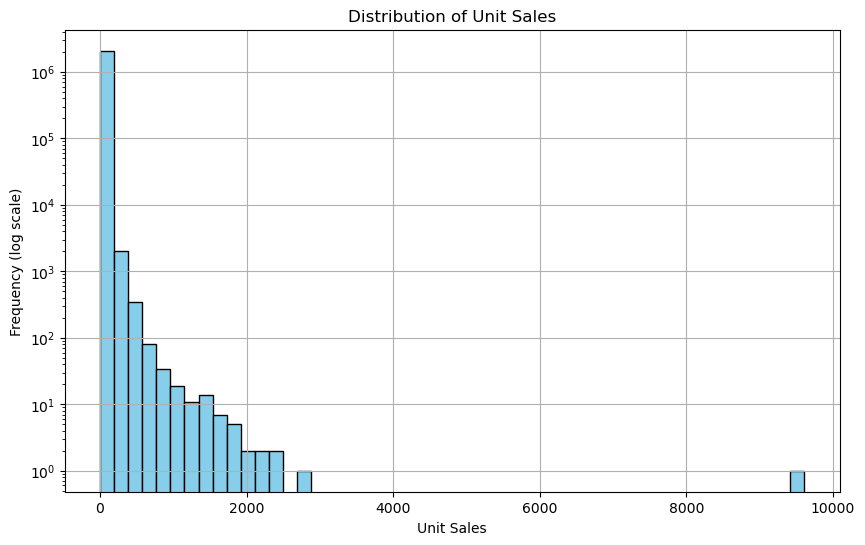

In [12]:
# Explore the values of unit_sales with a histogram
#df_ML['unit_sales'].hist(log = True)
#plt.ylim(1, 100)
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.hist(df_ML['unit_sales'], bins=50, log=True, color='skyblue', edgecolor='black')  # Adjust number of bins and range as needed
plt.xlabel('Unit Sales')
plt.ylabel('Frequency (log scale)')
plt.title('Distribution of Unit Sales')
plt.grid(True)
plt.show()

In [13]:
# Figure out how many entries there are where the sales exceed 4000
count_of_sales_above_4k = df_ML[df_ML["unit_sales"] >= 4000].shape[0]
print(count_of_sales_above_4k)

# Remove entries where the sales exceed 4000
df_ML = df_ML[df_ML["unit_sales"] <= 4000]

count_of_sales_above_4k = df_ML[df_ML["unit_sales"] >= 4000].shape[0]
print(count_of_sales_above_4k)

1
0


# Step 2: split in 5 folds. 4 will be used to train the model. 1 will be used to test.

In [15]:
# Select the columns that represent the variables that influence our target variable: unit_sales
selected_columns = ['month', 'day', 'store_nbr', 'item_nbr']
X = df_ML[selected_columns]
y = df_ML['unit_sales']

# Split the data
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.8, random_state=6)

In [16]:
# Create linear regression model and fit the training data
line_fitter = linear_model.LinearRegression()
line_fitter.fit(x_train, y_train)

LinearRegression()

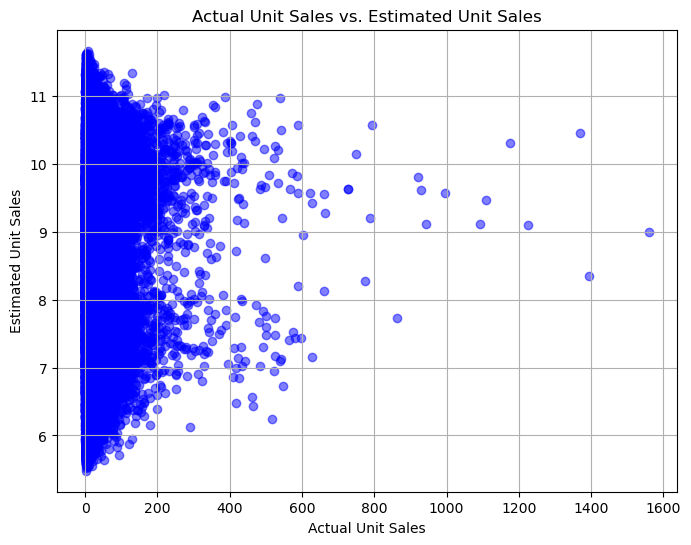

In [17]:
# Predict unit_sales for the test set
predicted_unit_sales = line_fitter.predict(x_test)

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predicted_unit_sales, color='blue', alpha=0.5)
plt.title('Actual Unit Sales vs. Estimated Unit Sales')
plt.xlabel('Actual Unit Sales')
plt.ylabel('Estimated Unit Sales')
plt.grid(True)
plt.show()

It appears that the model severely underpredicts the unit sales. To remedy this I will take the sales of only one store. Then train the model with the item_nbr and date.

# Step 1: Revisited

In [43]:
# Approach 2: take the sales of only one store. Then train the model with the item_nbr and date.
# Load salesdata
df_sales = pd.read_csv("src/sales_clean.csv")

# select relevant columns
selected_columns = ['date', 'store_nbr', 'item_nbr', 'unit_sales']
df_ML = df_sales[selected_columns]

# To test the approach, take data from store 1
#df_ML = df_ML[df_ML['store_nbr'] == 1]

#Format the date column
df_ML['date'] = pd.to_datetime(df_ML['date'])


# Print dataframe information
for col in df_ML.columns:
    print("_______________________________________________")
    print(f"The type of {col} is {df_ML[col].dtype}")
    print(f"The minimum value of column {col} is {df_ML[col].min()}")
    print(f"The maximum value of column {col} is {df_ML[col].max()}")

_______________________________________________
The type of date is datetime64[ns, UTC]
The minimum value of column date is 2013-01-01 00:00:00+00:00
The maximum value of column date is 2017-08-15 00:00:00+00:00
_______________________________________________
The type of store_nbr is int64
The minimum value of column store_nbr is 1
The maximum value of column store_nbr is 54
_______________________________________________
The type of item_nbr is int64
The minimum value of column item_nbr is 96995
The maximum value of column item_nbr is 2127114
_______________________________________________
The type of unit_sales is float64
The minimum value of column unit_sales is -300.0
The maximum value of column unit_sales is 9610.0


C:\Users\tangu\AppData\Local\Temp\ipykernel_9636\1978806082.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [45]:
# Remove rows with negative unit_sales
df_ML = df_ML[df_ML['unit_sales'] >= 0]
    
# Remove entries where the sales exceed 4000
df_ML = df_ML[df_ML["unit_sales"] <= 4000]

# Format unit_sales to int
df_ML['unit_sales'] = df_ML['unit_sales'].astype(int)

# Print dataframe information
for col in df_ML.columns:
    print("_______________________________________________")
    print(f"The type of {col} is {df_ML[col].dtype}")
    print(f"The minimum value of column {col} is {df_ML[col].min()}")
    print(f"The maximum value of column {col} is {df_ML[col].max()}")

_______________________________________________
The type of date is datetime64[ns, UTC]
The minimum value of column date is 2013-01-01 00:00:00+00:00
The maximum value of column date is 2017-08-15 00:00:00+00:00
_______________________________________________
The type of store_nbr is int64
The minimum value of column store_nbr is 1
The maximum value of column store_nbr is 54
_______________________________________________
The type of item_nbr is int64
The minimum value of column item_nbr is 96995
The maximum value of column item_nbr is 2127114
_______________________________________________
The type of unit_sales is int32
The minimum value of column unit_sales is 0
The maximum value of column unit_sales is 2750


# Step 2: Revisited

C:\Users\tangu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\tangu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\tangu\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\tangu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\tangu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, 

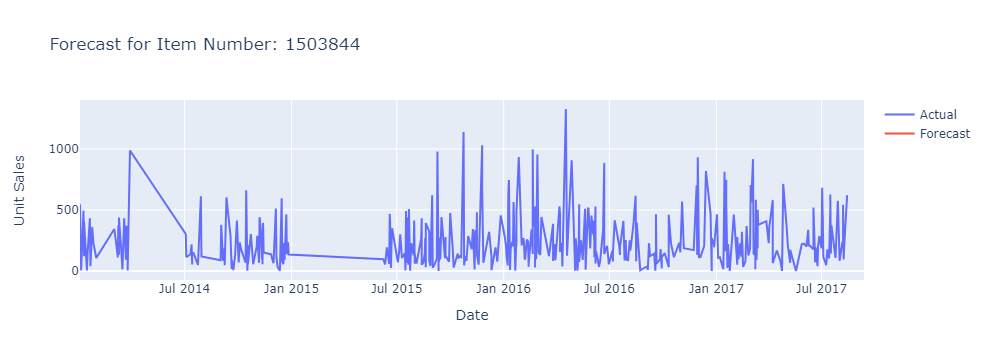

In [49]:
import plotly.graph_objs as go
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Function to generate forecast for a given item_nbr
def generate_forecast(item_nbr):
    # Prepare data for SARIMAX
    data = df_ML[df_ML['item_nbr'] == item_nbr][['date', 'unit_sales']].rename(columns={'date': 'ds', 'unit_sales': 'y'})
    data['ds'] = pd.to_datetime(data['ds'])
    data.set_index('ds', inplace=True)
    
    # Fit SARIMAX model
    model = SARIMAX(data['y'], order=(1, 0, 1), seasonal_order=(0, 0, 0, 0))  # Adjusted parameters
    results = model.fit(disp=False)
    
    # Make future predictions
    future = pd.date_range(start=data.index[-1], periods=30)  # Adjust the number of future periods
    forecast = results.get_forecast(steps=len(future))
    forecast_index = pd.Index(future, name='ds')
    forecast_df = pd.DataFrame(forecast.predicted_mean, index=forecast_index, columns=['yhat'])
    
    # Create an interactive plot
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=data.index, y=data['y'], mode='lines', name='Actual'))
    fig.add_trace(go.Scatter(x=forecast_df.index, y=forecast_df['yhat'], mode='lines', name='Forecast'))
    fig.update_layout(title='Forecast for Item Number: {}'.format(item_nbr), xaxis_title='Date', yaxis_title='Unit Sales')
    fig.show()

# Call the function with a specific item_nbr
item_to_forecast = 1503844
generate_forecast(item_to_forecast)
